#### The Object of this Lab is to Analyze Hotels Business Performance & Customer Behaviour to predict and reduce the impact of Reservation Cancellation rate.

I have chosen a dataset of two Hotels located in Portugal. One is a Resort Hotel located in Algarve (Typical Holiday destination for Leisure) and the other one is a city Hotel located in Lisbon (More Corporate Travel). 
We have more than 100.000 reservations from july 2015 to August 2017 to perform the analysis. 

The originial dataset can be found here: https://www.kaggle.com/datasets/mathsian/hotel-bookings

Extra information about the dataset can be found here: https://www.researchgate.net/publication/329286343_Hotel_booking_demand_datasets

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading file to abstract data
data = pd.read_csv ('hotel_bookings.csv')

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#Standarizing Headers 
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

standardize_header(data)

In [5]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Displaying Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Checking for Duplicates
data.duplicated().sum()

31994

In [8]:
#Dropping duplicated data & Checking sum 
data.drop_duplicates(keep='first', inplace=True)
display(data.shape)
data.duplicated().sum()

(87396, 32)

0

In [9]:
#Checking NaN Values
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [10]:
#Dealing with nan Values of children
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [11]:
data['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [12]:
# I decided to replace the 4 nan values for the most common variable which is 0. 
# Actually a nan value in the number of children could mean that there are actually no children in the reservation 
data['children'] = data['children'].fillna(0)

In [13]:
data['children'].value_counts()

0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [14]:
#Dealing with nan Values of country 
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [15]:
data['country'].value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [16]:
# I decided to replace the Nan Values that are only 452 for PRT which is by far the main client country
data['country'] = data['country'].fillna('PRT')

In [17]:
data['country'].value_counts()

PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [18]:
#Dealing with nan Values of agent
data['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [19]:
data['agent'].value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

#### The PMS of the Hotel assured no missing data exists in its database tables. However, in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

In [20]:
# As written before, nan values here means the reservation was not performed through a travel agent. 
# I will replace the nan values for 0 which means, not applicable. 
data['agent'] = data['agent'].fillna(0)

In [21]:
data['agent'].value_counts()

9.0      28759
240.0    13028
0.0      12193
14.0      3349
7.0       3300
         ...  
257.0        1
291.0        1
93.0         1
483.0        1
449.0        1
Name: agent, Length: 334, dtype: int64

In [22]:
#Dealing with nan Values of company
data['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [23]:
data['company'].value_counts()

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

In [24]:
# Same thing as in the previous agent case 
data['company'] = data['company'].fillna(0)

In [25]:
data['company'].value_counts()

0.0      82137
40.0       851
223.0      503
45.0       238
153.0      206
         ...  
96.0         1
76.0         1
184.0        1
54.0         1
402.0        1
Name: company, Length: 353, dtype: int64

In [26]:
#ReChecking NaN Values
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [27]:
#Splitting into Categorical and Numerical variables to do some cleaning 
categorical_df = data.select_dtypes('object')
numerical_df = data.select_dtypes(np.number)

In [28]:
#Going deeper categorical cleaning
categorical_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [29]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    87396 non-null  object
 1   arrival_date_month       87396 non-null  object
 2   meal                     87396 non-null  object
 3   country                  87396 non-null  object
 4   market_segment           87396 non-null  object
 5   distribution_channel     87396 non-null  object
 6   reserved_room_type       87396 non-null  object
 7   assigned_room_type       87396 non-null  object
 8   deposit_type             87396 non-null  object
 9   customer_type            87396 non-null  object
 10  reservation_status       87396 non-null  object
 11  reservation_status_date  87396 non-null  object
dtypes: object(12)
memory usage: 8.7+ MB


In [30]:
for col in categorical_df.columns:
    print(categorical_df[col].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'T

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


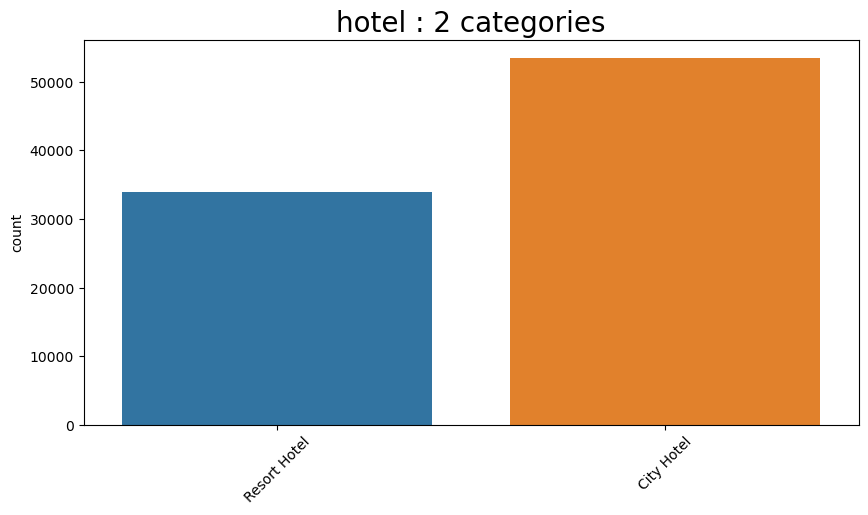

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


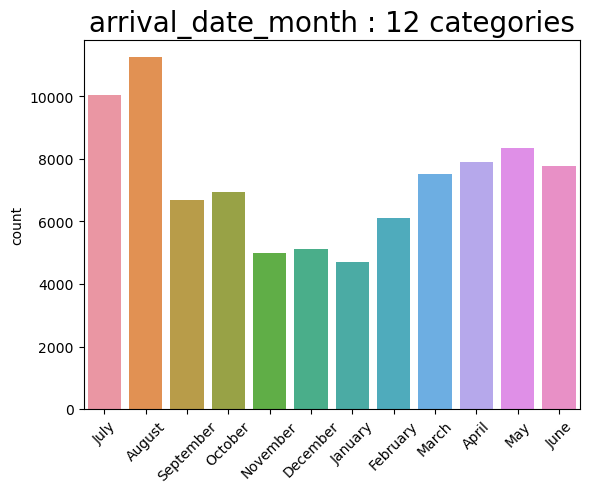

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


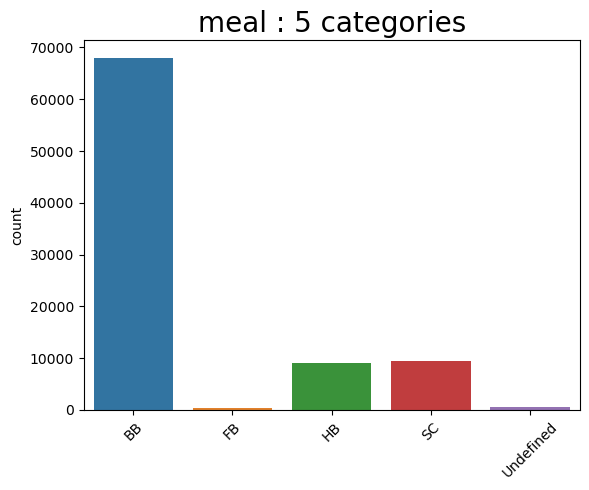

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


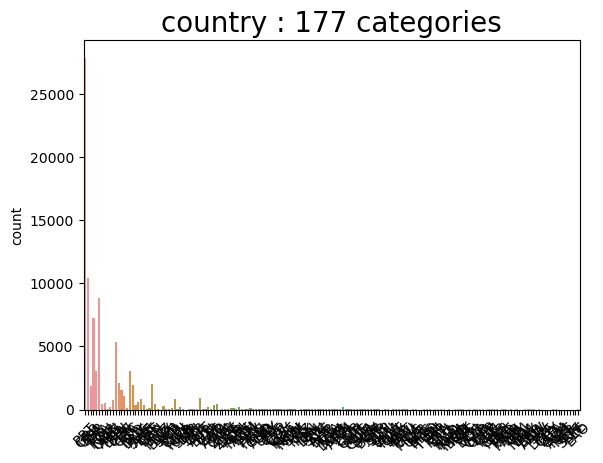

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


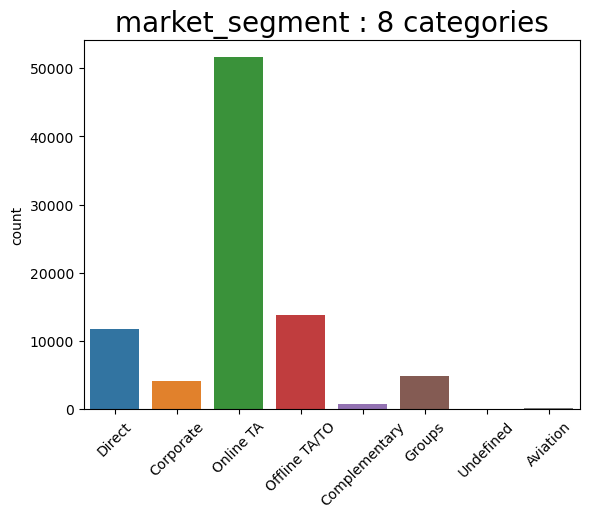

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


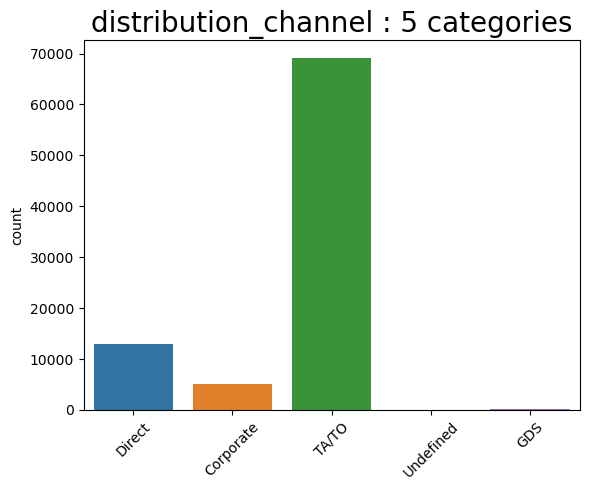

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


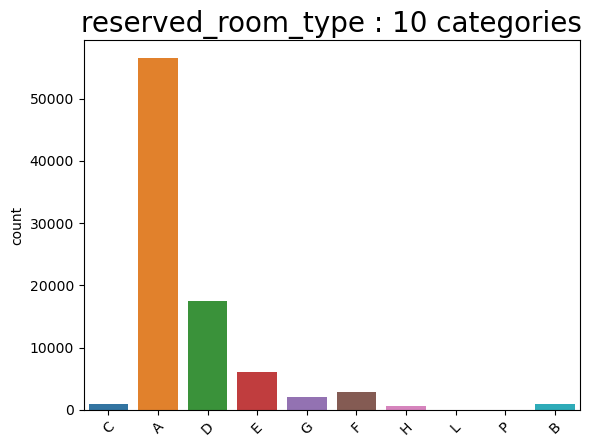

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


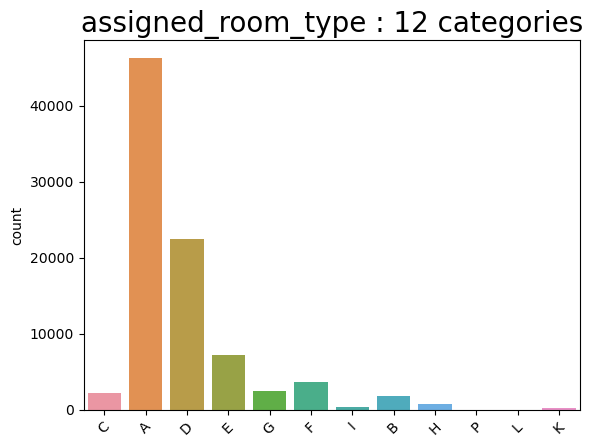

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


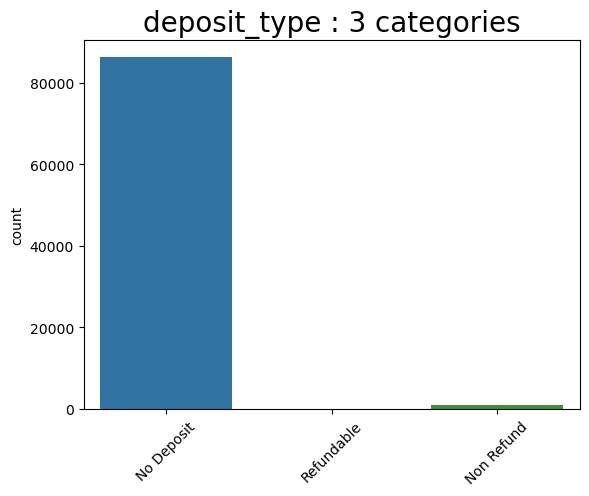

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


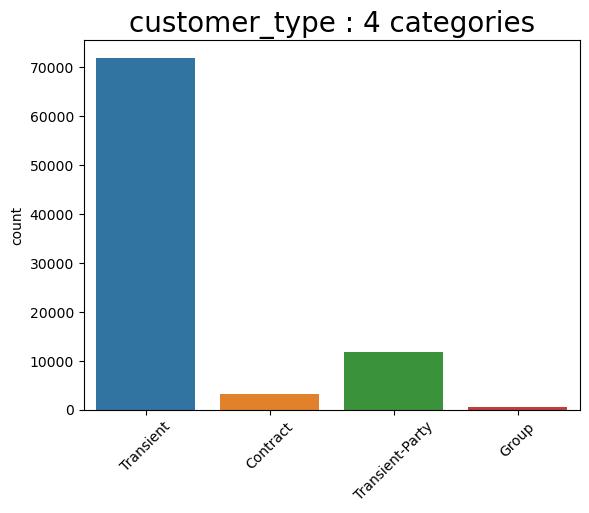

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


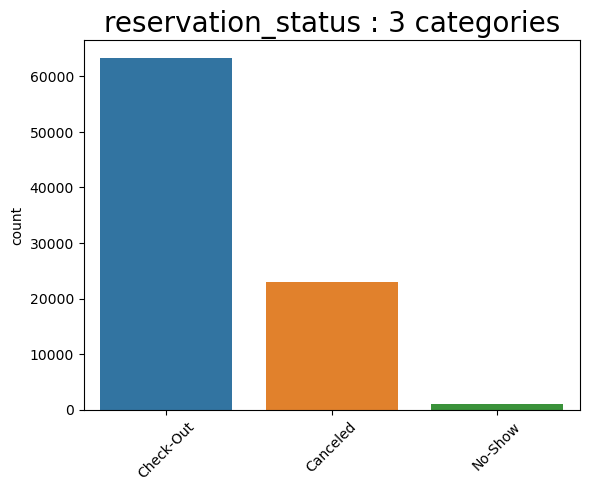

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


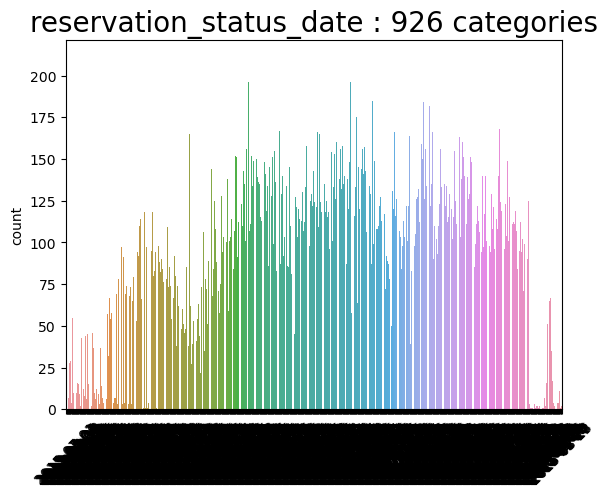

In [31]:
# Plotting the Categorical Variables into Graphs 
def cntplot_cat(df):
    for col in df.columns:
        title = f"{col} : {len(df[col].unique())} categories"
        sns.countplot(df[col])
        plt.xticks(rotation=45)
        plt.xlabel(None)          
        plt.title(title,fontsize=20)
        plt.show()
    return None
   
plt.figure(figsize = (10,5))
cntplot_cat(categorical_df)

In [32]:
# In Meal I can group SC & Undefined as they mean the same ( No meal ) so I group them into SO (Stay only)
categorical_df['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [33]:
categorical_df["meal"] = np.where(categorical_df.meal.isin(['SC','Undefined']),'SO', categorical_df.meal)
categorical_df['meal'].value_counts()

BB    67978
SO     9973
HB     9085
FB      360
Name: meal, dtype: int64

In [34]:
# In market segment we have a category called Undefined with 2 values, which I will include as Online TA, the biggest variable.  
categorical_df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [35]:
categorical_df["market_segment"] = np.where(categorical_df.market_segment.isin(['Undefined']),'Online TA', categorical_df.market_segment)
categorical_df['market_segment'].value_counts()

Online TA        51620
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

In [36]:
# In distribution channel we have a category called Undefined with 5 values, which I will include as TA/TO, the biggest variable.  
categorical_df['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [37]:
categorical_df["distribution_channel"] = np.where(categorical_df.distribution_channel.isin(['Undefined']),'TA/TO', categorical_df.distribution_channel)
categorical_df['distribution_channel'].value_counts()

TA/TO        69146
Direct       12988
Corporate     5081
GDS            181
Name: distribution_channel, dtype: int64

In [38]:
# Converting the date into datetime format
categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'])

In [39]:
# Assigning the date into a variable to concat later 
date = categorical_df['reservation_status_date']

In [40]:
date

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 87396, dtype: datetime64[ns]

In [41]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   hotel                    87396 non-null  object        
 1   arrival_date_month       87396 non-null  object        
 2   meal                     87396 non-null  object        
 3   country                  87396 non-null  object        
 4   market_segment           87396 non-null  object        
 5   distribution_channel     87396 non-null  object        
 6   reserved_room_type       87396 non-null  object        
 7   assigned_room_type       87396 non-null  object        
 8   deposit_type             87396 non-null  object        
 9   customer_type            87396 non-null  object        
 10  reservation_status       87396 non-null  object        
 11  reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(11

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


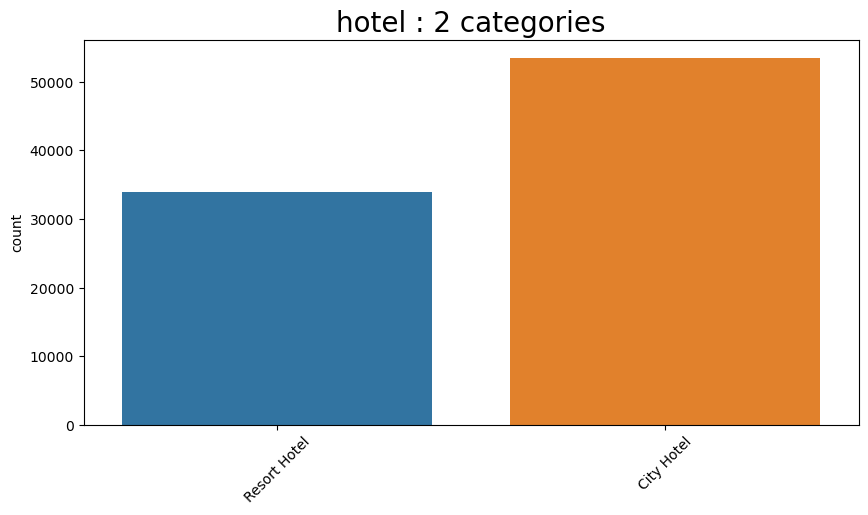

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


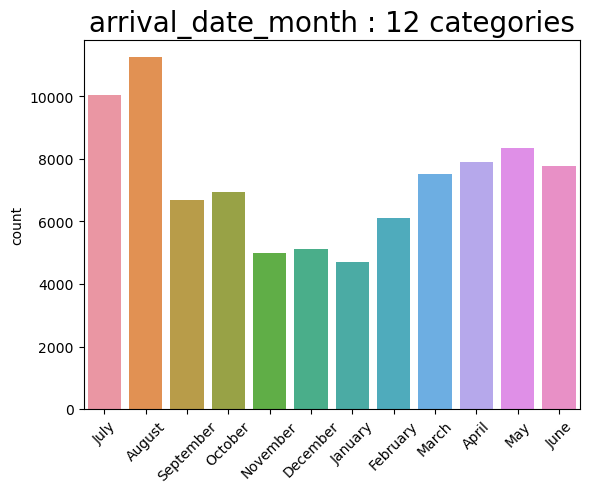

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


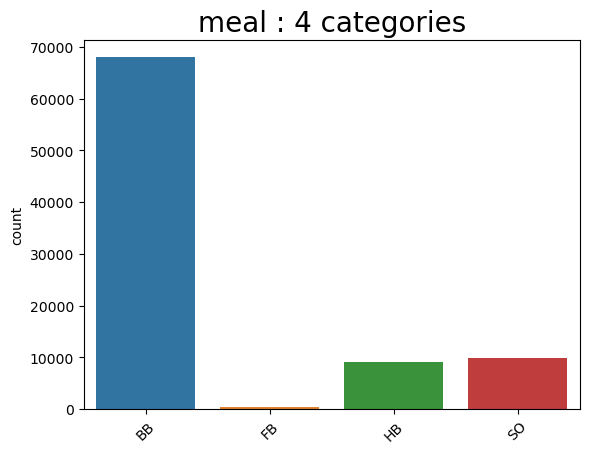

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


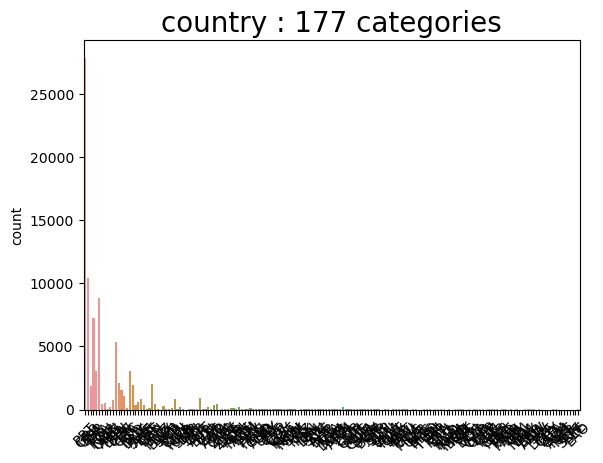

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


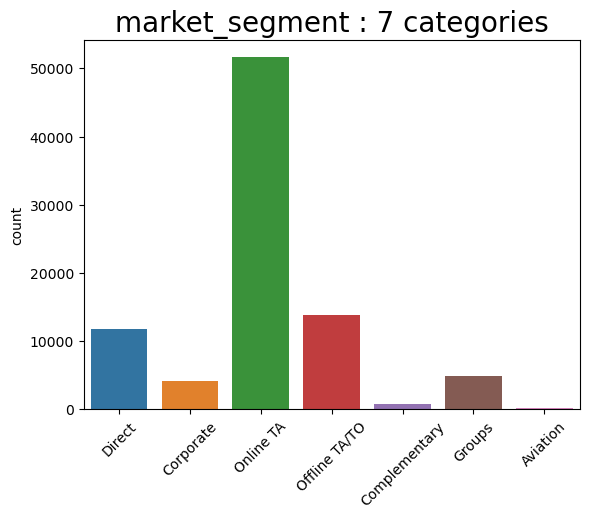

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


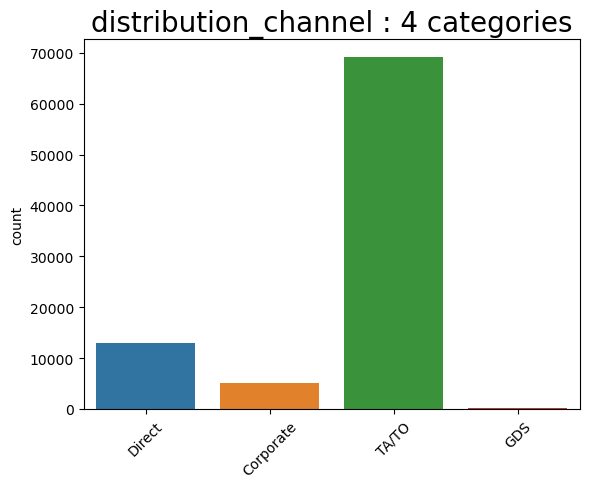

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


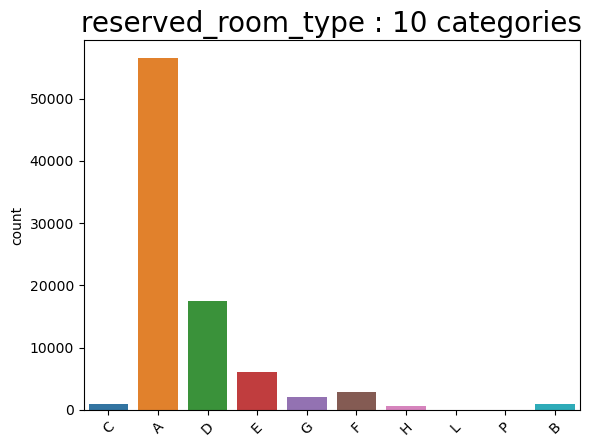

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


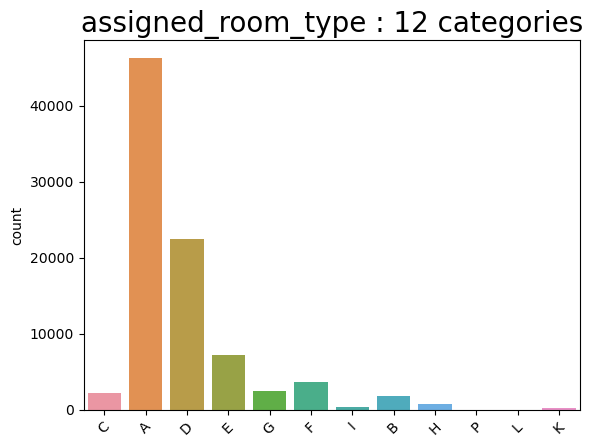

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


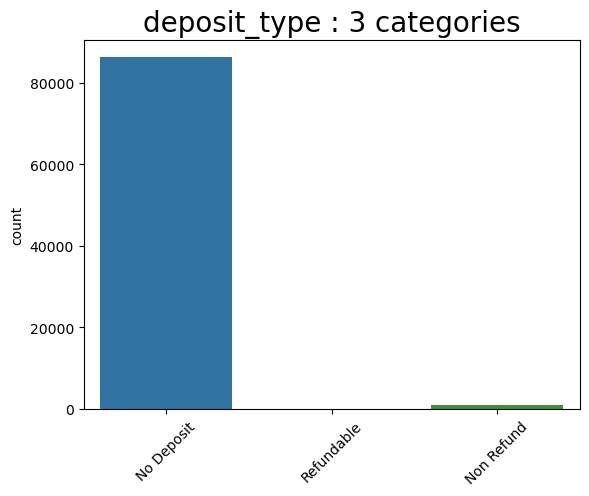

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


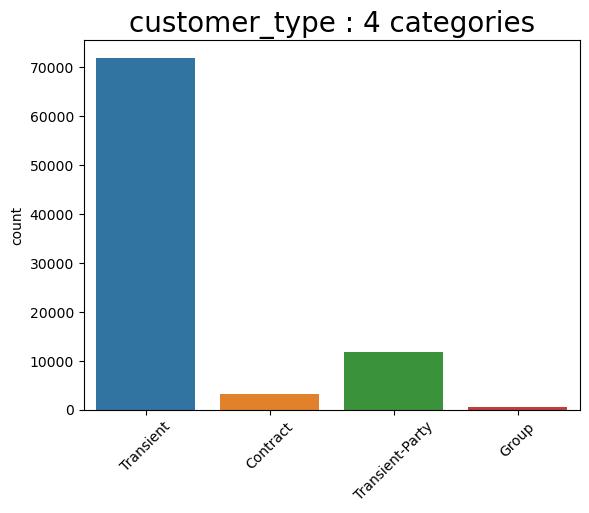

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


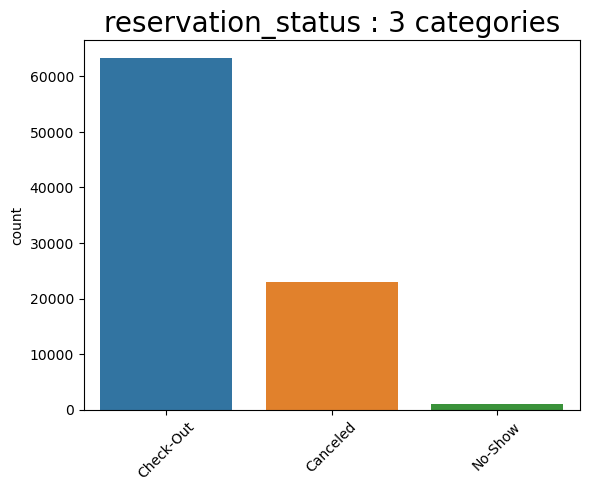

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


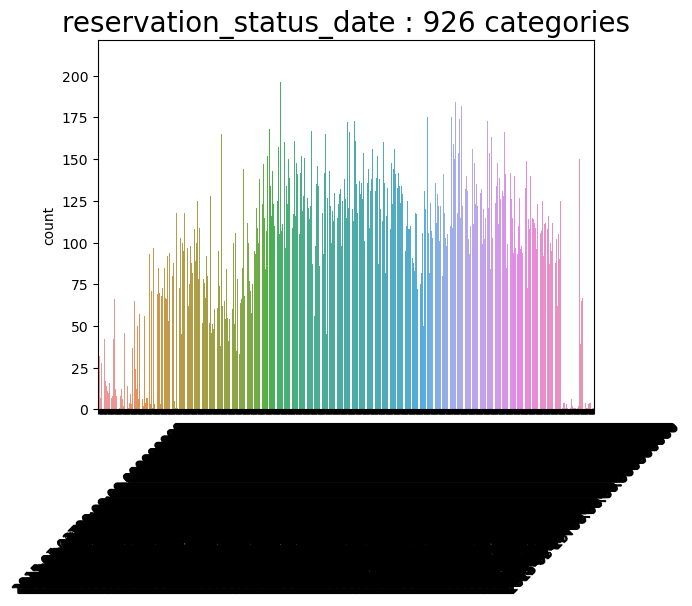

In [42]:
# Plotting the Modified Categorical Variables into Graphs 
def cntplot_cat(df):
    for col in df.columns:
        title = f"{col} : {len(df[col].unique())} categories"
        sns.countplot(df[col])
        plt.xticks(rotation=45)
        plt.xlabel(None)          
        plt.title(title,fontsize=20)
        plt.show()
    return None
   
plt.figure(figsize = (10,5))
cntplot_cat(categorical_df)

In [43]:
#Going deeper numerical cleaning
numerical_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [44]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_week_number        87396 non-null  int64  
 4   arrival_date_day_of_month       87396 non-null  int64  
 5   stays_in_weekend_nights         87396 non-null  int64  
 6   stays_in_week_nights            87396 non-null  int64  
 7   adults                          87396 non-null  int64  
 8   children                        87396 non-null  float64
 9   babies                          87396 non-null  int64  
 10  is_repeated_guest               87396 non-null  int64  
 11  previous_cancellations          87396 non-null  int64  
 12  previous_bookings_not_canceled 

In [45]:
for col in numerical_df.columns:
    print(len(numerical_df[col].unique()))

2
479
3
53
31
17
35
14
5
5
2
15
73
21
334
353
128
8879
5
6


In [46]:
# I think we can group the columns adult, children and babies as total guests. 
numerical_df['total_guests'] = numerical_df['adults'] + numerical_df['children'] + numerical_df['babies']

In [47]:
numerical_df = numerical_df.drop(['adults','children','babies'], axis=1)

In [48]:
# Checking if we have rows tih 0 values to drop them 
print('Data with 0 guest: {0} out of {1} all data'.format(numerical_df[numerical_df['total_guests'] == 0].shape[0], numerical_df.shape[0]))

Data with 0 guest: 166 out of 87396 all data


In [49]:
# I think we can group as well the columns stays in weekend nights and stays in week nights as total stay. 
numerical_df['total_stay'] = numerical_df['stays_in_weekend_nights'] + numerical_df['stays_in_week_nights']

In [50]:
numerical_df = numerical_df.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1)

In [51]:
# Checking if we have rows tih 0 values to drop them 
print('Data with 0 guest: {0} out of {1} all data'.format(numerical_df[numerical_df['total_guests'] == 0].shape[0], numerical_df.shape[0]))

Data with 0 guest: 166 out of 87396 all data


In [52]:
# Dropping the rows with 0 values in total guest and total stay which are useless for my analysis
numerical_df_clean = numerical_df[(numerical_df['total_guests'] > 0) & (numerical_df['total_stay'] > 0)].copy()

In [53]:
numerical_df_clean

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
2,0,7,2015,27,1,0,0,0,0,0.0,0.0,0,75.00,0,0,1.0,1
3,0,13,2015,27,1,0,0,0,0,304.0,0.0,0,75.00,0,0,1.0,1
4,0,14,2015,27,1,0,0,0,0,240.0,0.0,0,98.00,0,1,2.0,2
6,0,0,2015,27,1,0,0,0,0,0.0,0.0,0,107.00,0,0,2.0,2
7,0,9,2015,27,1,0,0,0,0,303.0,0.0,0,103.00,0,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,0,0,0,0,394.0,0.0,0,96.14,0,0,2.0,7
119386,0,102,2017,35,31,0,0,0,0,9.0,0.0,0,225.43,0,2,3.0,7
119387,0,34,2017,35,31,0,0,0,0,9.0,0.0,0,157.71,0,4,2.0,7
119388,0,109,2017,35,31,0,0,0,0,89.0,0.0,0,104.40,0,0,2.0,7


In [54]:
# Continuous and Discrete lists
discrete_list = []
continuous_list = []
for col in numerical_df_clean.columns:
    if len(numerical_df_clean[col].unique()) < (numerical_df_clean.shape[0] * 0.03):
        discrete_list.append(col)
    else: 
        continuous_list.append(col)
display(discrete_list)
display(continuous_list) 

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'total_stay']

['adr']

In [55]:
def c_d_dif(df):
    discrete_list = []
    continuous_list = []
    for col in df.columns:
        if len(df[col].unique()) < (numerical_df_clean.shape[0] * 0.03):
            discrete_list.append(col)
        else: 
            continuous_list.append(col)
    return discrete_list,continuous_list

In [56]:
discrete_list,continuous_list = c_d_dif(numerical_df)

In [57]:
discrete_df = numerical_df_clean[discrete_list]
discrete_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
2,0,7,2015,27,1,0,0,0,0,0.0,0.0,0,0,0,1.0,1
3,0,13,2015,27,1,0,0,0,0,304.0,0.0,0,0,0,1.0,1
4,0,14,2015,27,1,0,0,0,0,240.0,0.0,0,0,1,2.0,2
6,0,0,2015,27,1,0,0,0,0,0.0,0.0,0,0,0,2.0,2
7,0,9,2015,27,1,0,0,0,0,303.0,0.0,0,0,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,0,0,0,0,394.0,0.0,0,0,0,2.0,7
119386,0,102,2017,35,31,0,0,0,0,9.0,0.0,0,0,2,3.0,7
119387,0,34,2017,35,31,0,0,0,0,9.0,0.0,0,0,4,2.0,7
119388,0,109,2017,35,31,0,0,0,0,89.0,0.0,0,0,0,2.0,7


In [58]:
continuous_df = numerical_df_clean[continuous_list]
continuous_df

,adr
2,75.00
3,75.00
4,98.00
6,107.00
7,103.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


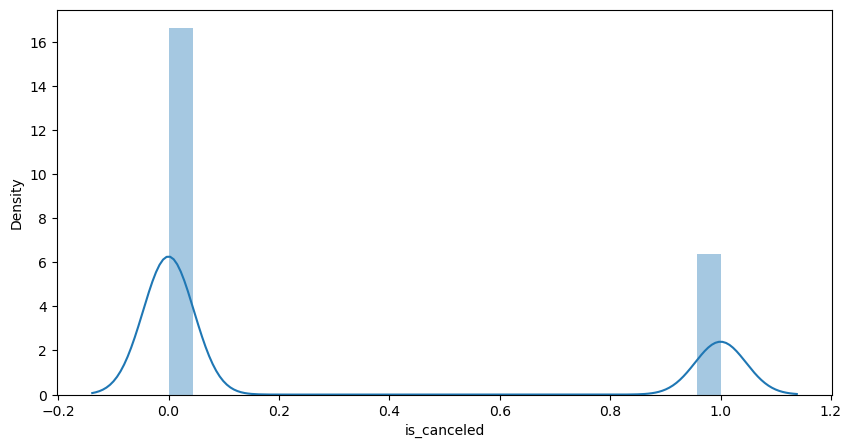

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


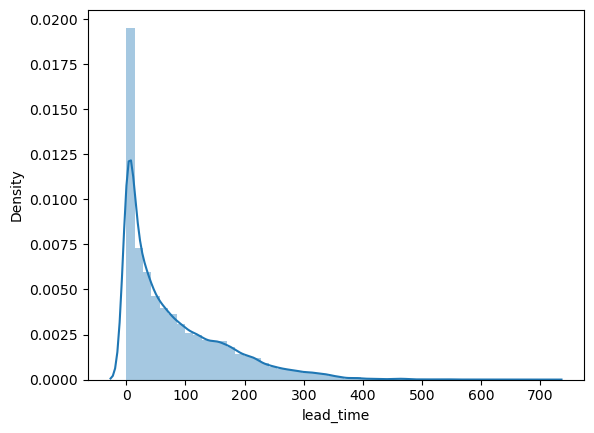

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


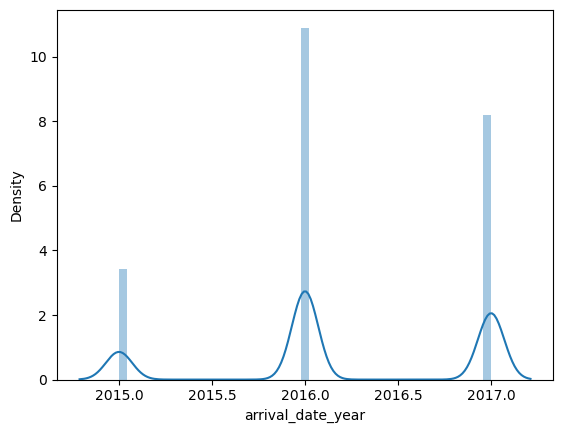

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


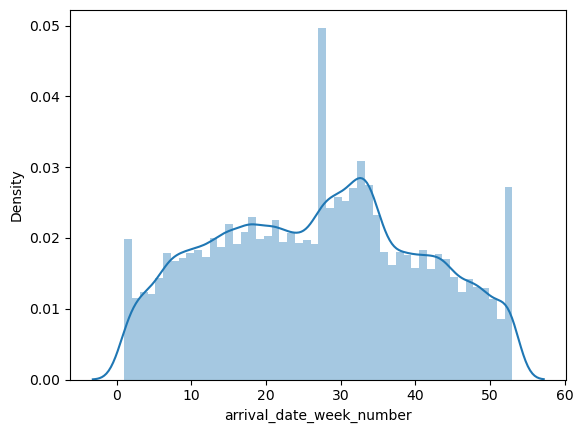

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


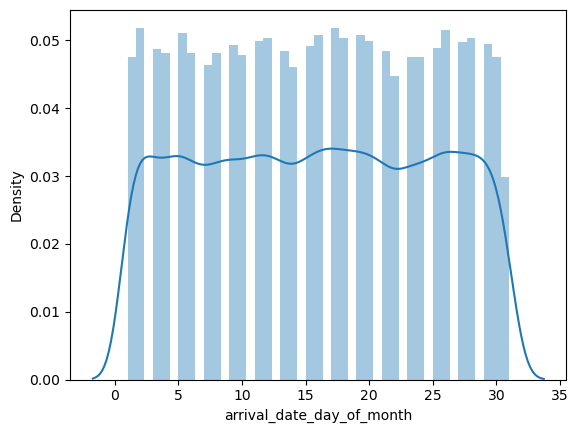

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


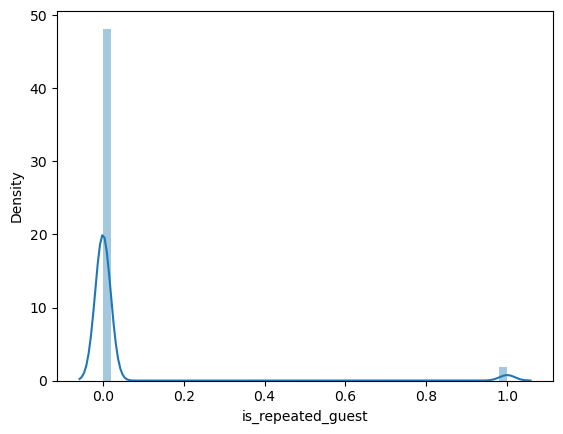

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


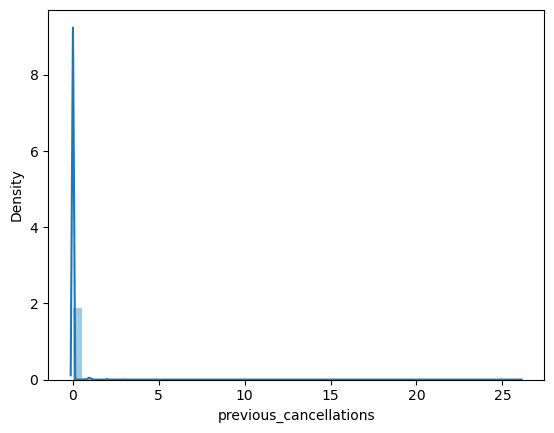

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


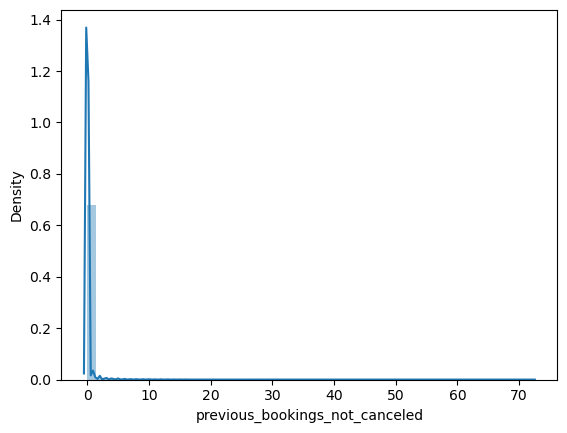

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


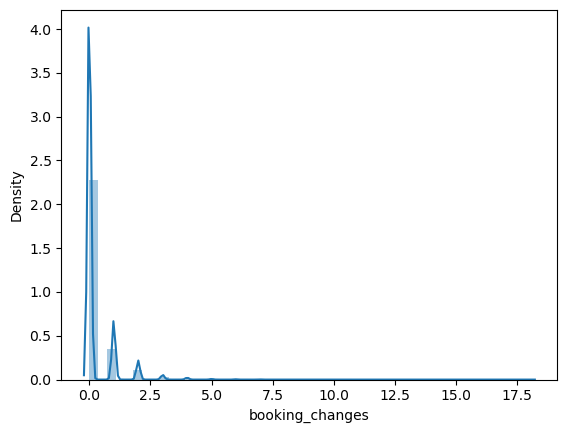

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


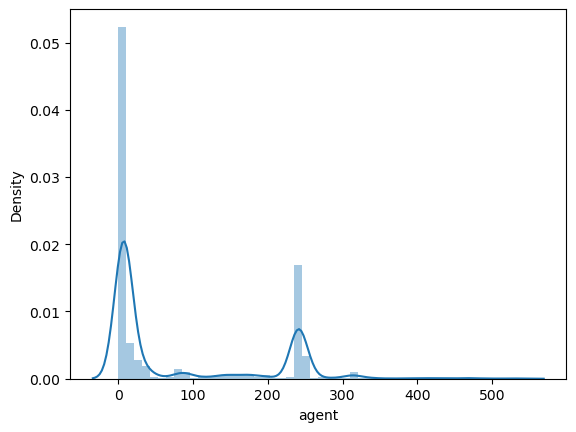

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


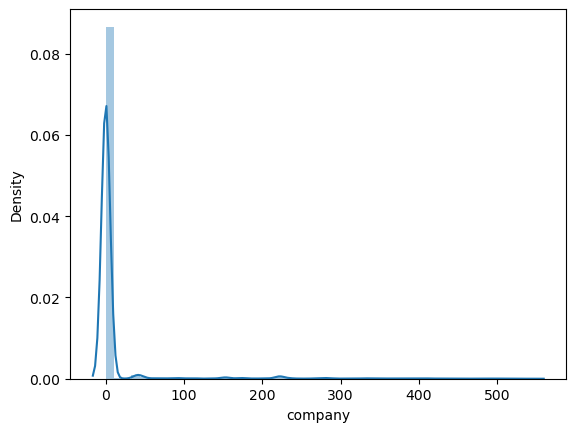

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


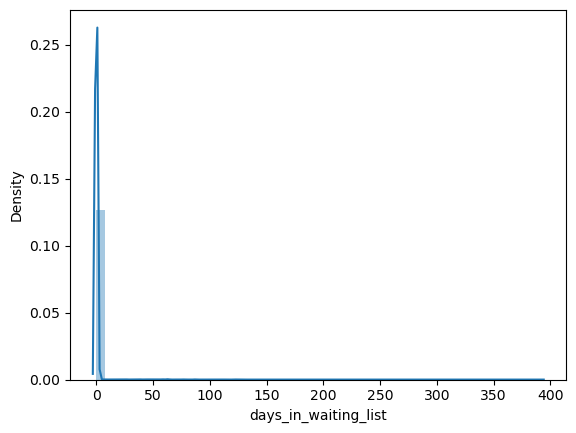

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


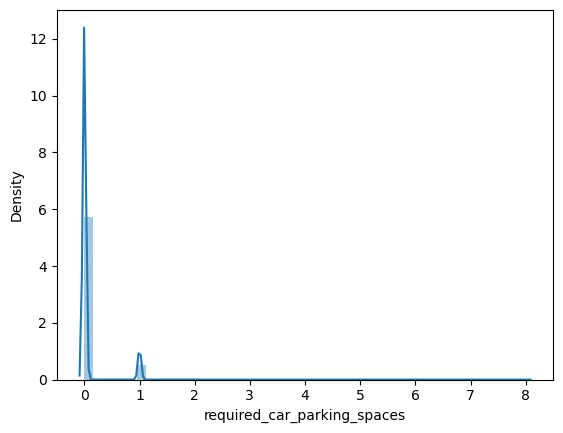

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


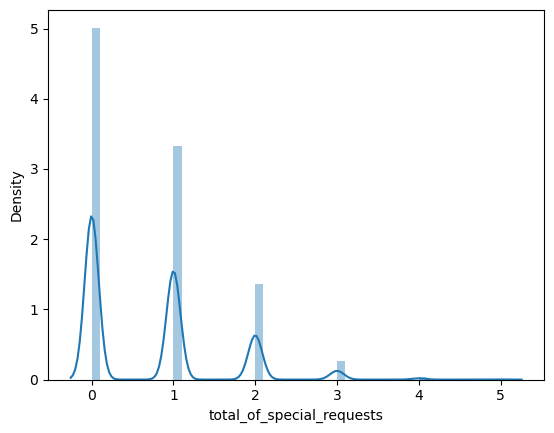

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


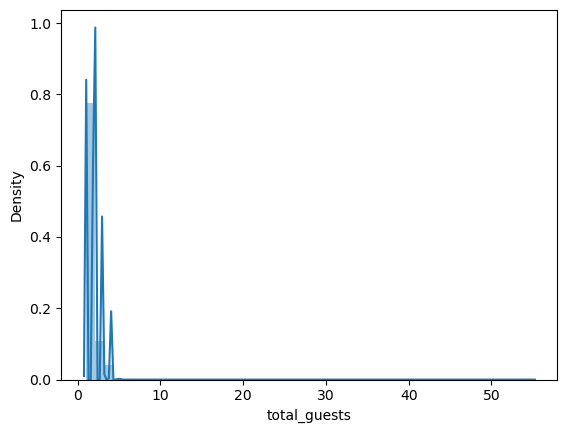

C:\Users\ChristianGardel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


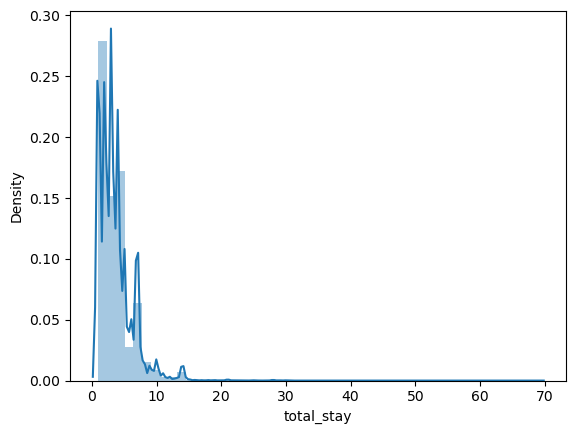

In [59]:
# Plotting the Numerical Variables into Graphs 
# Discrete Variables Plots
plt.figure(figsize = (10,5))
for column in numerical_df_clean[discrete_list]:
    sns.distplot(numerical_df_clean[column])
    plt.show()

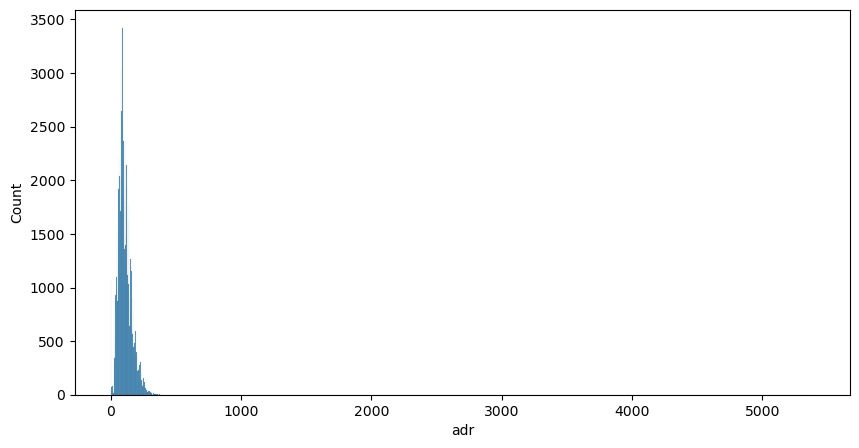

In [60]:
# Continuous Variable Plot
plt.figure(figsize = (10,5))
for column in numerical_df_clean[continuous_list]:
    sns.histplot(numerical_df_clean[column])
    plt.show()

In [61]:
# I am checking discrete where i found outliers. 
sns.boxplot(numerical_df['monthly_premium_auto'])
plt.show()

KeyError: 'monthly_premium_auto'

In [68]:
data2 = pd.concat([categorical_df, numerical_df_clean], axis=1)
data2 = data2.dropna(axis=0)
display(data2.shape)
display(data2.head())
display(data2.tail())

(86639, 29)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,...,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,1.0,1.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,...,0.0,0.0,304.0,0.0,0.0,75.0,0.0,0.0,1.0,1.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,...,0.0,0.0,240.0,0.0,0.0,98.0,0.0,1.0,2.0,2.0
6,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,2.0,2.0
7,Resort Hotel,July,FB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,0.0,0.0,303.0,0.0,0.0,103.0,0.0,1.0,2.0,2.0


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,...,0.0,0.0,394.0,0.0,0.0,96.14,0.0,0.0,2.0,7.0
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,...,0.0,0.0,9.0,0.0,0.0,225.43,0.0,2.0,3.0,7.0
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,...,0.0,0.0,9.0,0.0,0.0,157.71,0.0,4.0,2.0,7.0
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,...,0.0,0.0,89.0,0.0,0.0,104.40,0.0,0.0,2.0,7.0
119389,City Hotel,August,HB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,...,0.0,0.0,9.0,0.0,0.0,151.20,0.0,2.0,2.0,9.0


In [69]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86639 entries, 2 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86639 non-null  object        
 1   arrival_date_month              86639 non-null  object        
 2   meal                            86639 non-null  object        
 3   country                         86639 non-null  object        
 4   market_segment                  86639 non-null  object        
 5   distribution_channel            86639 non-null  object        
 6   reserved_room_type              86639 non-null  object        
 7   assigned_room_type              86639 non-null  object        
 8   deposit_type                    86639 non-null  object        
 9   customer_type                   86639 non-null  object        
 10  reservation_status              86639 non-null  object        
 11  r

In [70]:
data2.dtypes

hotel                                     object
arrival_date_month                        object
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
reserved_room_type                        object
assigned_room_type                        object
deposit_type                              object
customer_type                             object
reservation_status                        object
reservation_status_date           datetime64[ns]
is_canceled                              float64
lead_time                                float64
arrival_date_year                        float64
arrival_date_week_number                 float64
arrival_date_day_of_month                float64
is_repeated_guest                        float64
previous_cancellations                   float64
previous_bookings_not_canceled           float64
booking_changes     

In [71]:
for col in data2.columns:
    print(data2[col].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SO']
['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL' 'BHS'
 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'QAT' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'B

In [72]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

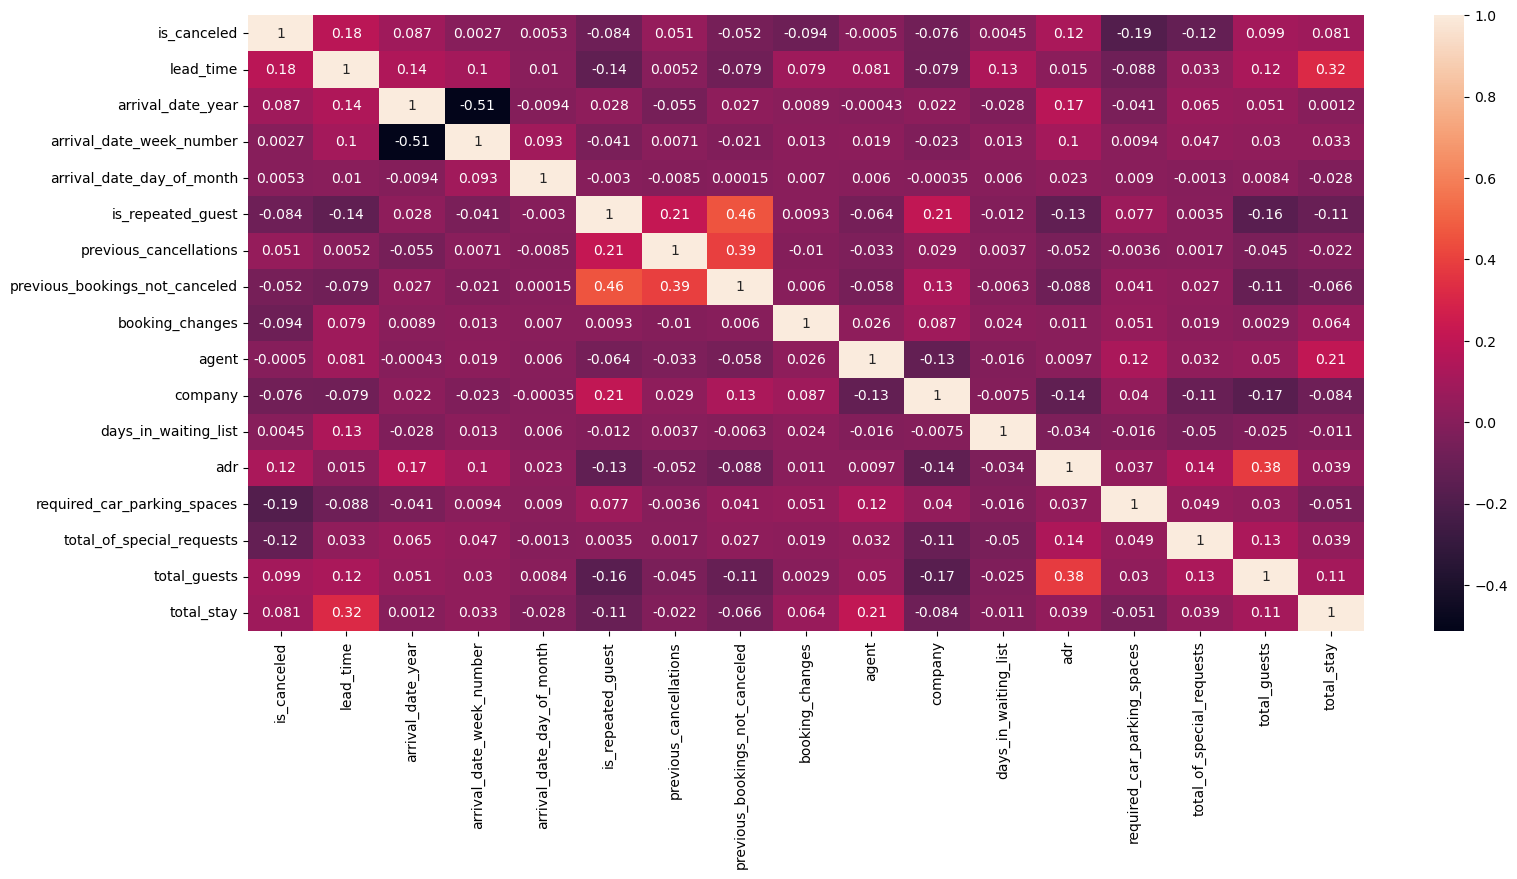

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data2.corr()  
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [79]:
y = data['is_canceled']
X = data.drop(['is_canceled'], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1224)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(69916, 31)

(17480, 31)

(69916,)

(17480,)

In [81]:
X_train_cat = X_train.select_dtypes(['object'])
X_test_cat = X_test.select_dtypes(['object'])

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

display(X_train_cat.shape)
display(X_test_cat.shape)
display(X_train_num.shape)
display(X_test_num.shape)

(69916, 12)

(17480, 12)

(69916, 19)

(17480, 19)

In [82]:
transformer = MinMaxScaler().fit(X_train_num)
x_train_num_norm = transformer.transform(X_train_num)
print(x_train_num_norm.shape)
x_train_num_norm
pd.DataFrame(x_train_num_norm, columns=X_train_num.columns)

(69916, 19)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.005427,1.0,0.403846,0.033333,0.000000,0.04,0.036364,0.1,0.0,0.0,0.0,0.0,0.000000,0.263551,0.0,0.0,0.282353,0.000,0.6
1,0.451832,1.0,0.576923,0.966667,0.210526,0.10,0.036364,0.1,0.0,0.0,0.0,0.0,0.000000,0.016822,0.0,0.0,0.234706,0.000,0.0
2,0.175034,1.0,0.000000,0.133333,0.000000,0.02,0.054545,0.0,0.0,0.0,0.0,0.0,0.000000,0.016822,0.0,0.0,0.264706,0.125,0.6
3,0.050204,0.5,0.826923,0.800000,0.000000,0.02,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.448598,0.0,0.0,0.117647,0.125,0.4
4,0.004071,0.0,0.576923,0.966667,0.052632,0.06,0.036364,0.2,0.0,0.0,0.0,0.0,0.047619,0.467290,0.0,0.0,0.368627,0.000,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69911,0.013569,0.5,0.846154,0.966667,0.052632,0.00,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.026168,0.0,0.0,0.235294,0.000,0.0
69912,0.016282,0.0,0.923077,0.966667,0.157895,0.14,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.448598,0.0,0.0,0.092549,0.000,0.0
69913,0.054274,0.5,0.865385,0.366667,0.105263,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.013084,0.0,0.0,0.118588,0.000,0.4
69914,0.116689,0.0,0.557692,0.633333,0.105263,0.10,0.036364,0.1,0.0,0.0,0.0,0.0,0.047619,0.467290,0.0,0.0,0.339078,0.000,0.2


In [83]:
x_test_num_norm = transformer.transform(X_test_num)
print(x_test_num_norm.shape)
x_test_num_norm
pd.DataFrame(x_test_num_norm, columns=X_test_num.columns)

(17480, 19)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.004071,0.0,0.615385,0.300000,0.052632,0.06,0.036364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016822,0.000000,0.0,0.158824,0.000,0.2
1,0.017639,0.5,0.576923,0.766667,0.105263,0.00,0.054545,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016822,0.000000,0.0,0.366667,0.000,0.2
2,0.000000,0.5,0.288462,0.466667,0.052632,0.04,0.036364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016822,0.000000,0.0,0.198039,0.000,0.2
3,0.035278,1.0,0.250000,0.066667,0.052632,0.06,0.018182,0.0,0.0,1.0,0.0,0.013889,0.142857,0.000000,0.517495,0.0,0.098039,0.000,0.0
4,0.059701,1.0,0.596154,0.266667,0.000000,0.04,0.036364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016822,0.000000,0.0,0.274510,0.000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,0.048847,1.0,0.173077,0.166667,0.052632,0.06,0.036364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.016822,0.000000,0.0,0.196667,0.000,0.8
17476,0.138399,0.5,0.519231,0.233333,0.105263,0.12,0.036364,0.0,0.0,0.0,0.0,0.000000,0.047619,0.016822,0.000000,0.0,0.194118,0.000,0.2
17477,0.018996,0.5,0.769231,0.066667,0.052632,0.04,0.036364,0.0,0.0,0.0,0.0,0.000000,0.095238,0.011215,0.000000,0.0,0.090196,0.125,0.0
17478,0.073270,0.5,0.826923,0.933333,0.105263,0.02,0.036364,0.0,0.0,0.0,0.0,0.000000,0.000000,0.246729,0.000000,0.0,0.186275,0.000,0.2


In [90]:
# One hot encoding 
onehot_train = X_train_cat.drop(['country','reservation_status_date'],axis = 1)
onehot_test = X_test_cat.drop(['country','reservation_status_date'],axis = 1)

In [91]:
encoder = OneHotEncoder(handle_unknown ='error', drop='first').fit(onehot_train)
X_train_cat_encoded  = encoder.transform(onehot_train).toarray()
X_test_cat_encoded = encoder.transform(onehot_test).toarray()

In [95]:
X_train_processed = np.concatenate((X_train_cat_encoded,x_train_num_norm), axis=1)
X_test_processed = np.concatenate((X_test_cat_encoded,x_test_num_norm), axis=1)

In [97]:
lm = linear_model.LinearRegression()
lm.fit(X_train_processed,y_train)

LinearRegression()

In [98]:
predictions_train = lm.predict(X_train_processed)
r2_score(y_train, predictions_train)

1.0

In [99]:
predictions_test = lm.predict(X_test_processed)
r2_score(y_test, predictions_test)

1.0